# Bản đồ không có điểm thưởng

Ở phần này,chúng em sẽ cố gắng chọn các bản đồ càng đơn giản càng tốt, nhằm rút trích ra các điểm khác nhau chính giữa các chiến thuật của các thuật toán. Riêng 2 bản đồ lớn ở cuối thì em sinh ngẫu nhiên từ trang \url{https://www.dcode.fr/maze-generator} (có chỉnh sửa lại để làm rõ sự khác nhau giữa các thuật toán). 

In [13]:
%matplotlib inline
%cd ../../source

[WinError 2] The system cannot find the file specified: '../../source'
e:\Học Tập\BTVN_Chuyên_ngành\CSTTNT\HCMUS-IntroAI-Projects\source


In [14]:
from Graph import Graph
from searching_algorithms import *
from heuristic_func import euclide_heuristic, manhattan_heuristic

In [15]:
# Hàm client để chạy thuật toán tìm kiếm
def run_search_nobonus(g: Graph, algorithm, heuristic=None, figsize=(5, 3)):
    # g: đồ thị được đọc vào 
    # algorithm: con trỏ đến hàm tìm kiếm cần chạy
    g.clear()
    if heuristic:
        algorithm(g, heuristic)
    else:
        algorithm(g)
    visited, path, cost = g.get_visited()
    g.visualize(path, visited=visited, figsize=figsize)
    print('Cost:', cost)

## Bản đồ 1 (8x17)

In [40]:
g1 = Graph('testcases/nobonus1.txt')

Graph initialized from maze with size 8 x 17


### DFS

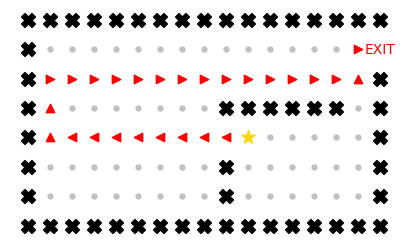

Starting point (x, y) = (4, 10)
Ending point (x, y) = (1, 16)
Cost: 27


In [41]:
run_search_nobonus(g1, DFS)

### BFS

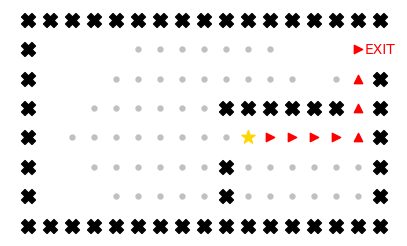

Starting point (x, y) = (4, 10)
Ending point (x, y) = (1, 16)
Cost: 9


In [42]:
run_search_nobonus(g1, BFS)

### Greedy Best-first Search

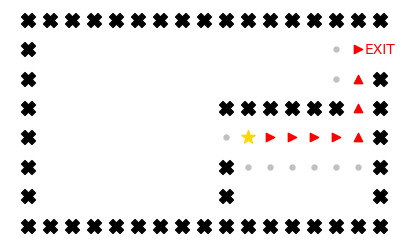

Starting point (x, y) = (4, 10)
Ending point (x, y) = (1, 16)
Cost: 9


In [43]:
run_search_nobonus(g1, GBFS, manhattan_heuristic)

### A*

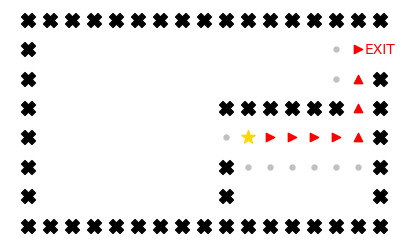

Starting point (x, y) = (4, 10)
Ending point (x, y) = (1, 16)
Cost: 9


In [44]:
# Đồ thị 1, A*
run_search_nobonus(g1, Astar, manhattan_heuristic)

**Chú thích:** <font color='red'>màu đỏ</font> đại diện cho <font color='red'>đường đi mà thuật toán đã tìm được</font>, còn các hình tròn màu <font color='grey'>màu xám</font> đại diện cho các ô mà thuật toán đã từng ghé thăm.

GBFS, BFS và A* đã tìm được đường đi ngắn nhất từ `START` đến `EXIT`. Còn DFS thì do chỉ "chăm chăm" vào đi một lối nên nó đã phải duyệt hết tất cả các hướng của bản đồ mới tìm được lối ra (điều này còn tùy thuộc vào implementation của DFS. Nhóm em tạo danh sách kề theo thứ tự: trên, dưới, phải, trái, nên DFS sẽ duyệt theo thứ tự ngược lại (vì nó dùng stack làm fringe)).

Ngoài ra, ta cũng thấy được trong map này GBFS và A* duyệt ít ô nhất (các ô màu xám) so với 2 thuật toán còn lại.

| Thuật toán | Chi phí |
|------------|---------|
| DFS        | 27      |
| BFS        | 9       |
| GBFS (M)   | 9       |
| A* (M)     | 9       |

## Bản đồ 2 (7x17)

In [45]:
g2 = Graph('testcases/nobonus2.txt')

Graph initialized from maze with size 9 x 17


### DFS

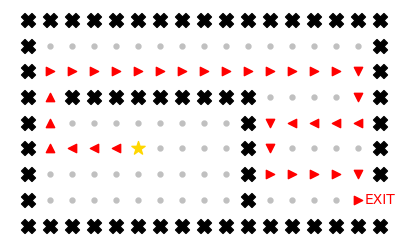

Starting point (x, y) = (5, 5)
Ending point (x, y) = (7, 16)
Cost: 35


In [46]:
run_search_nobonus(g2, DFS)

### BFS

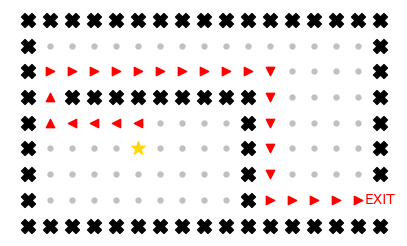

Starting point (x, y) = (5, 5)
Ending point (x, y) = (7, 16)
Cost: 27


In [47]:
run_search_nobonus(g2, BFS)

### Greedy Best-first Search

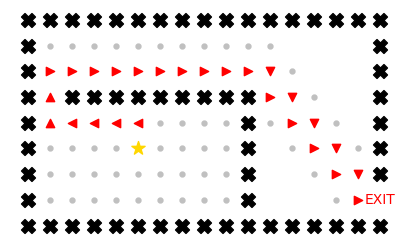

Starting point (x, y) = (5, 5)
Ending point (x, y) = (7, 16)
Cost: 27


In [48]:
run_search_nobonus(g2, GBFS, euclide_heuristic)

### A* (Manhattan)

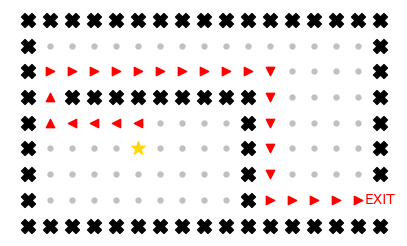

Starting point (x, y) = (5, 5)
Ending point (x, y) = (7, 16)
Cost: 27


In [49]:
run_search_nobonus(g2, Astar, manhattan_heuristic)

### A* (Euclide)

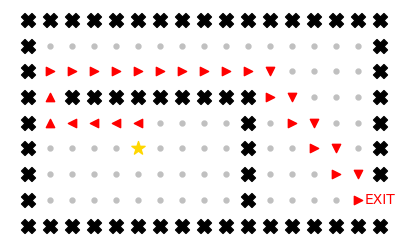

Starting point (x, y) = (5, 5)
Ending point (x, y) = (7, 16)
Cost: 27


In [50]:
run_search_nobonus(g2, Astar, euclide_heuristic)

Cũng tương tự như trên, BFS, GBFS và A* đã tìm được đường đi ngắn nhất từ `START` đến `EXIT`, còn DFS thì lại đi lòng vòng. Ở đây chúng em cũng cho thử A* với 2 hàm heuristic là hàm khoảng cách Manhattan và Euclide. Chi phí đường đi trong 2 trường hợp là như nhau, nhưng khi sử dụng heuristic là hàm Euclide thì thuật toán có xu hướng đi chéo (vì khoảng cách Euclide là khoảng cách "theo đường chéo" trên hệ trục tọa độ).  

Chiến lược của A* khác GBFS ở chỗ GBFS sẽ chạy thẳng tới điểm mà nó cho là gần đích nhất, trong khi đó A* sẽ mở thêm các node lân cận để "xem thử" có điểm nào gần đích hơn là đường đi mà nó vừa tìm được hay không.

| Thuật toán | Chi phí |
|------------|---------|
| DFS        | 35      |
| BFS        | 27      |
| GBFS (E)   | 27      |
| A* (M)     | 27      |
| A* (E)     | 27      |

## Bản đồ 3 (10x32)

In [51]:
g3 = Graph('testcases/nobonus3.txt')

Graph initialized from maze with size 10 x 32


### DFS

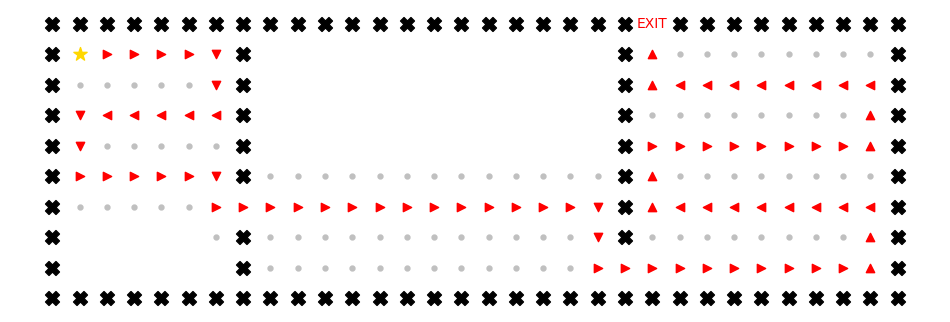

Starting point (x, y) = (1, 1)
Ending point (x, y) = (0, 22)
Cost: 78


In [52]:
run_search_nobonus(g3, DFS, figsize=(12, 4))

### BFS

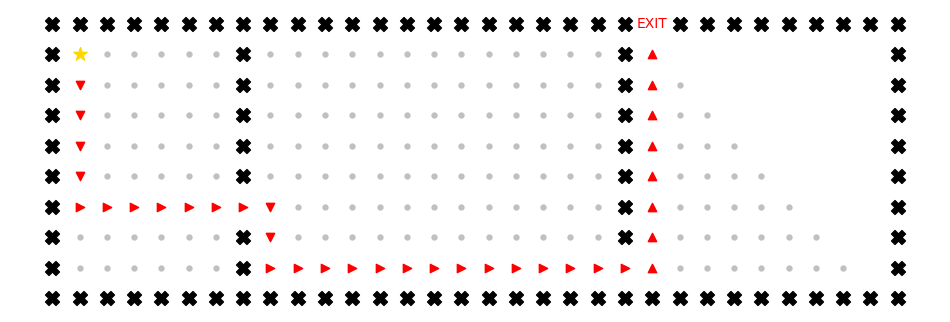

Starting point (x, y) = (1, 1)
Ending point (x, y) = (0, 22)
Cost: 36


In [53]:
run_search_nobonus(g3, BFS,figsize=(12, 4))

### Greedy Best-first Search (Manhattan)

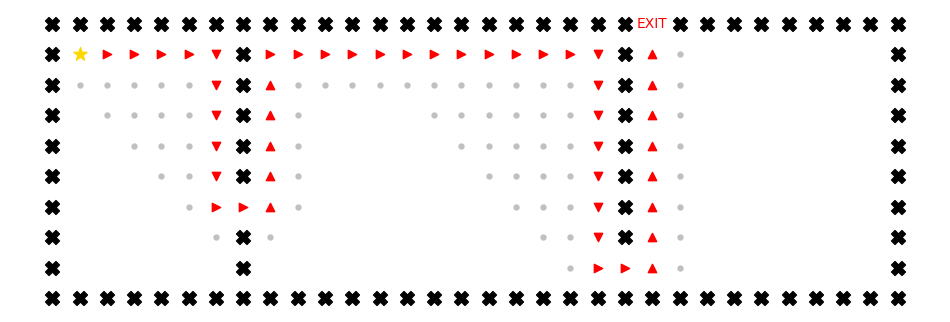

Starting point (x, y) = (1, 1)
Ending point (x, y) = (0, 22)
Cost: 46


In [54]:
run_search_nobonus(g3, GBFS,manhattan_heuristic,figsize=(12, 4))

### Greedy Best-first Search (Euclide)

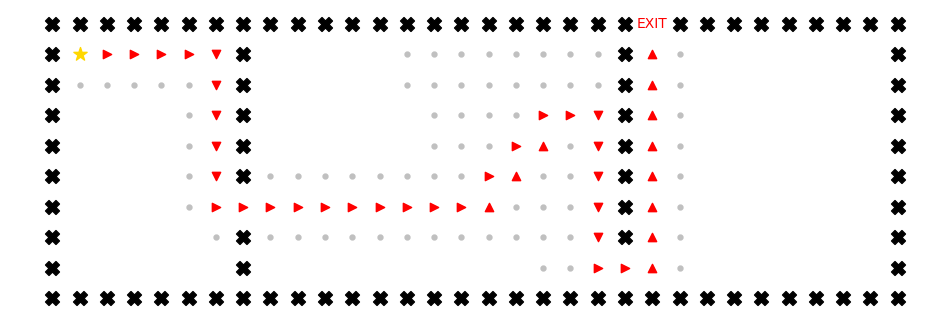

Starting point (x, y) = (1, 1)
Ending point (x, y) = (0, 22)
Cost: 42


In [55]:
run_search_nobonus(g3, GBFS, euclide_heuristic,figsize=(12,4))

### A* (Manhattan)

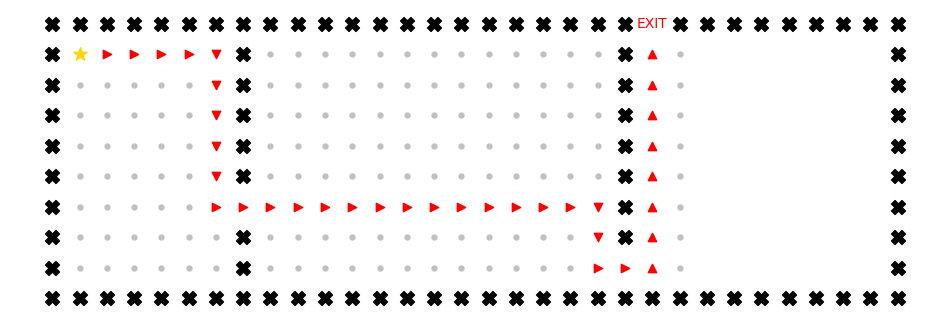

Starting point (x, y) = (1, 1)
Ending point (x, y) = (0, 22)
Cost: 36


In [56]:
run_search_nobonus(g3, Astar,manhattan_heuristic,figsize=(12, 4))

BFS và A* đã tìm được đường đi ngắn nhất từ `START` đến `EXIT` .DFS vẫn là thuật toán tốn nhiều chi phí nhất khi đi lòng vòng.


Ở đây chúng em thử GBFS với 2 hàm heuristic là hàm khoảng cách Manhattan và Euclide,chi phí đường đi của 2 trường hợp này là khác nhau và không có trường hợp nào tìm được đường đi ngắn nhất do điểm `EXIT` "được" một bờ tường che,khiến cách tìm điểm gần nhất với đích của GBFS không hiệu quả.Tuy nhiên với hàm khoảng cách Euclide thì GBFS "nhận ra" được bờ tường sớm hơn. 

Ngoài ra, ta cũng thấy được trong bản đồ này A* duyệt ít ô hơn (các ô màu xám) so với thuật toán BFS.

| Thuật toán | Chi phí |
|------------|---------|
| DFS        |   78    |
| BFS        |   36    |
| GBFS (M)   |   46    |
| GBFS (E)   |   42    |
| A* (M)     |   36    |

## Bản đồ 4 (21x31)

In [6]:
g4 = Graph('testcases/nobonus4.txt')

Graph initialized from maze with size 21 x 31


### DFS

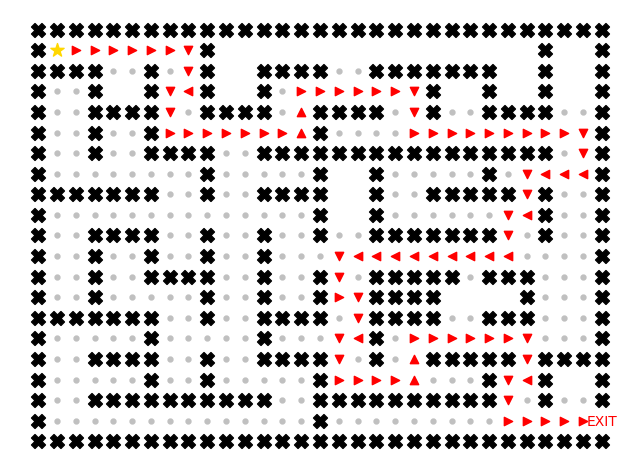

Starting point (x, y) = (1, 1)
Ending point (x, y) = (19, 30)
Cost: 87


In [58]:
run_search_nobonus(g4, DFS, figsize=(8, 6))

### BFS

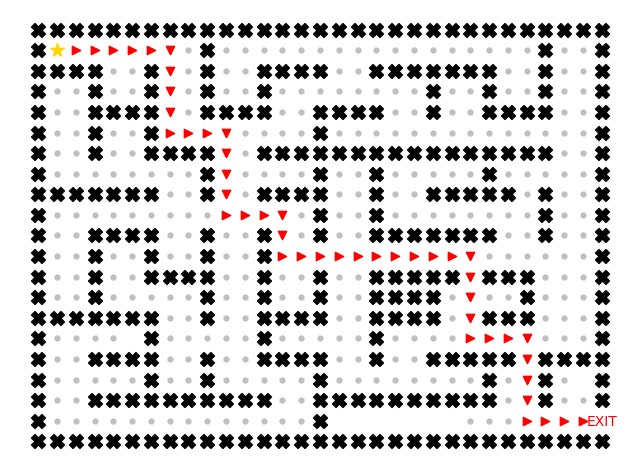

Starting point (x, y) = (1, 1)
Ending point (x, y) = (19, 30)
Cost: 47


In [59]:
run_search_nobonus(g4, BFS, figsize=(8, 6))

### Greedy Best-first Search (Manhattan)

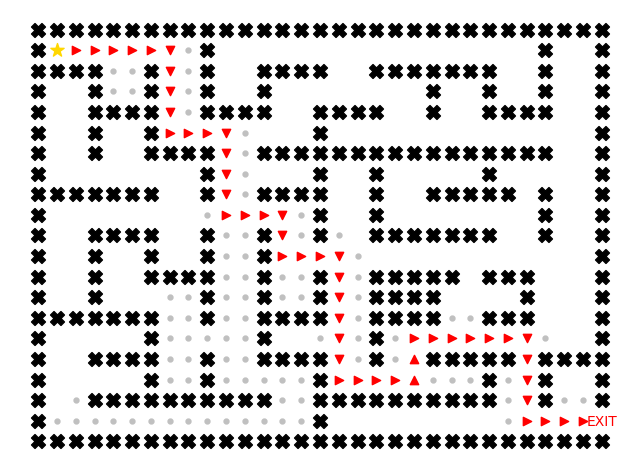

Starting point (x, y) = (1, 1)
Ending point (x, y) = (19, 30)
Cost: 51


In [7]:
run_search_nobonus(g4, GBFS,manhattan_heuristic,figsize=(8, 6))

### Greedy Best-first Search (Euclide)

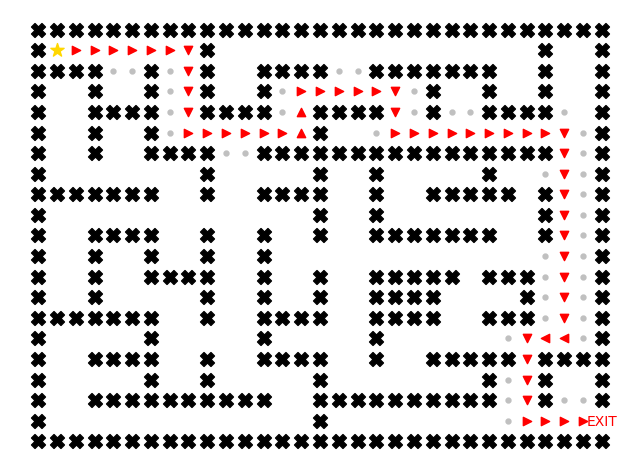

Starting point (x, y) = (1, 1)
Ending point (x, y) = (19, 30)
Cost: 55


In [8]:
run_search_nobonus(g4, GBFS, euclide_heuristic,figsize=(8,6))

### A* (Manhattan)

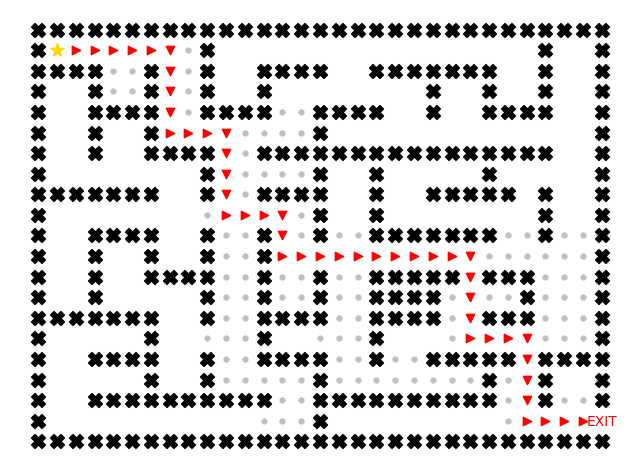

Starting point (x, y) = (1, 1)
Ending point (x, y) = (19, 30)
Cost: 47


In [ ]:
run_search_nobonus(g4, Astar,manhattan_heuristic,figsize=(8, 6))

BFS và A* đã tìm được đường đi ngắn nhất từ `START` đến `EXIT` .DFS vẫn là thuật toán tốn nhiều chi phí nhất khi đi lòng vòng.

Ở đây chúng em thử GBFS với 2 hàm heuristic là hàm khoảng cách Manhattan và Euclide,chi phí đường đi của 2 trường hợp này là khác nhau và không có trường hợp nào tìm được đường đi ngắn nhất.Tuy nhiên khác với mê cung 3,trong mê cung này hàm khoảng cách Euclid tỏ ra kém hiệu quả hơn hàm khoảng cách Manhattan do đường đi ngắn nhất mê cung có ít sự ngăn cản từ các bức tường.

Ngoài ra, ta cũng thấy được trong bản đồ này A* duyệt ít ô hơn (các ô màu xám) so với thuật toán BFS.

| Thuật toán | Chi phí |
|------------|---------|
| DFS        |    87    |
| BFS        |    47    |
| GBFS (M)   |    51    |
| GBFS (E)   |    55    |
| A* (M)     |    47    |

## Bản đồ 5 (31x71)

In [63]:
g5 = Graph('testcases/nobonus5.txt')

Graph initialized from maze with size 31 x 71


### DFS

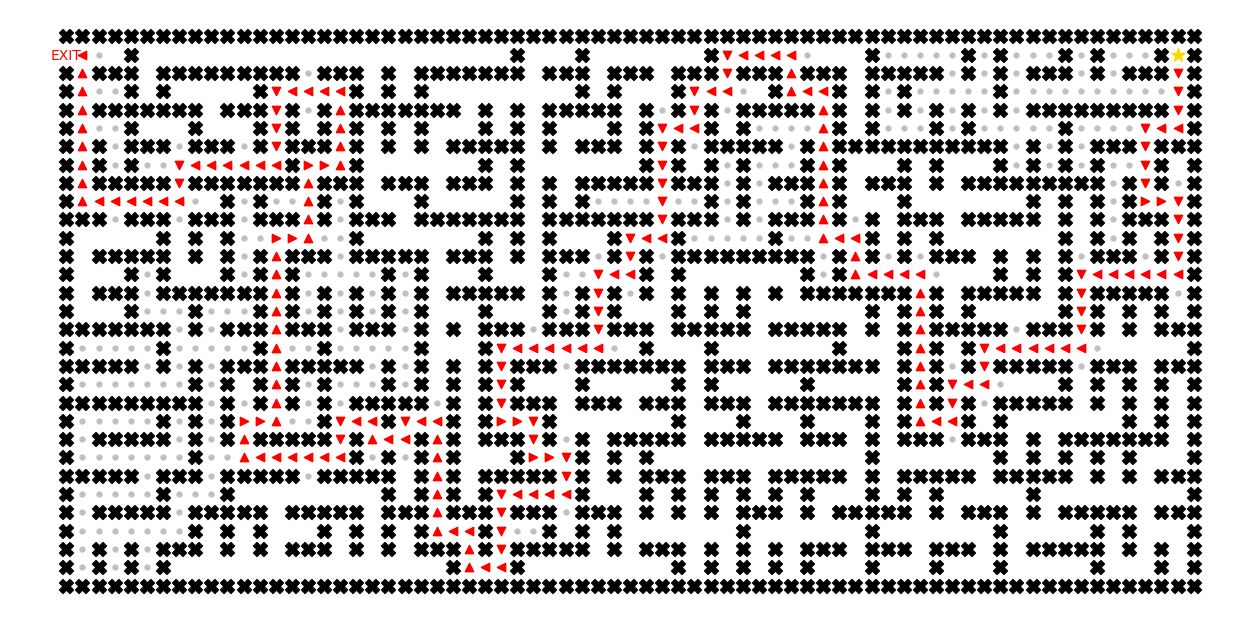

Starting point (x, y) = (1, 69)
Ending point (x, y) = (1, 0)
Cost: 207


In [64]:
run_search_nobonus(g5, DFS, figsize=(16, 8))

### BFS

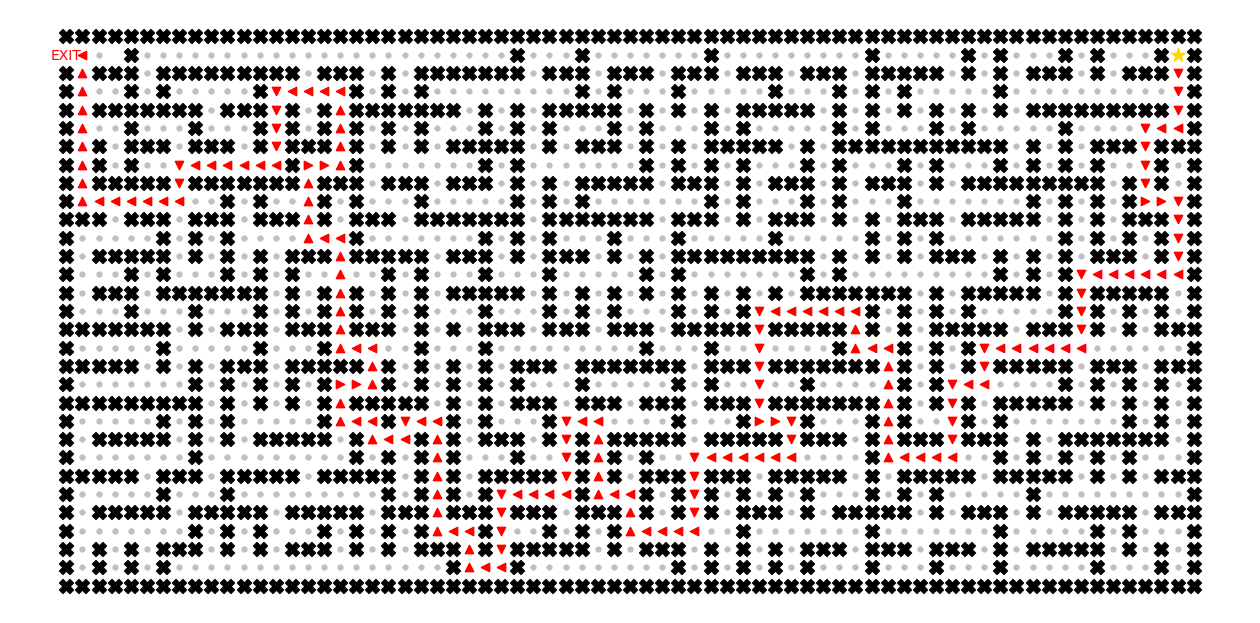

Starting point (x, y) = (1, 69)
Ending point (x, y) = (1, 0)
Cost: 183


In [65]:
run_search_nobonus(g5, BFS, figsize=(16, 8))

### Greedy Best-first Search (Euclide)

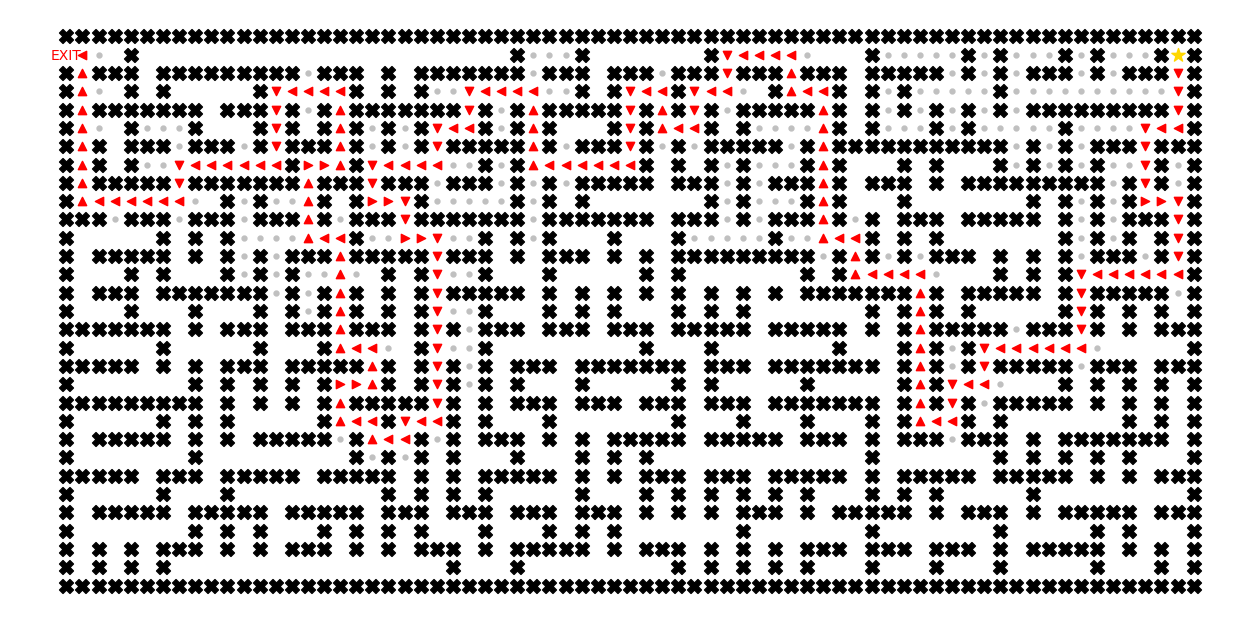

Starting point (x, y) = (1, 69)
Ending point (x, y) = (1, 0)
Cost: 195


In [66]:
run_search_nobonus(g5, GBFS, euclide_heuristic,figsize=(16,8))

### Greedy Best-first Search (Manhattan)

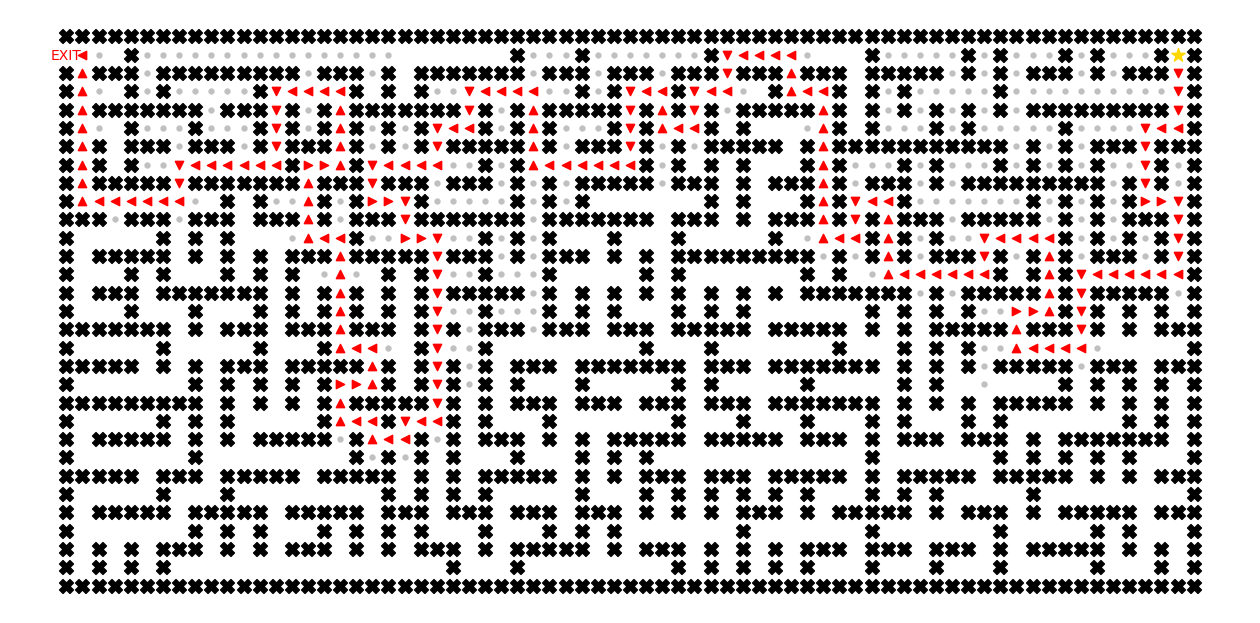

Starting point (x, y) = (1, 69)
Ending point (x, y) = (1, 0)
Cost: 199


In [68]:
run_search_nobonus(g5, GBFS,manhattan_heuristic,figsize=(16, 8))

### A* (Euclide)

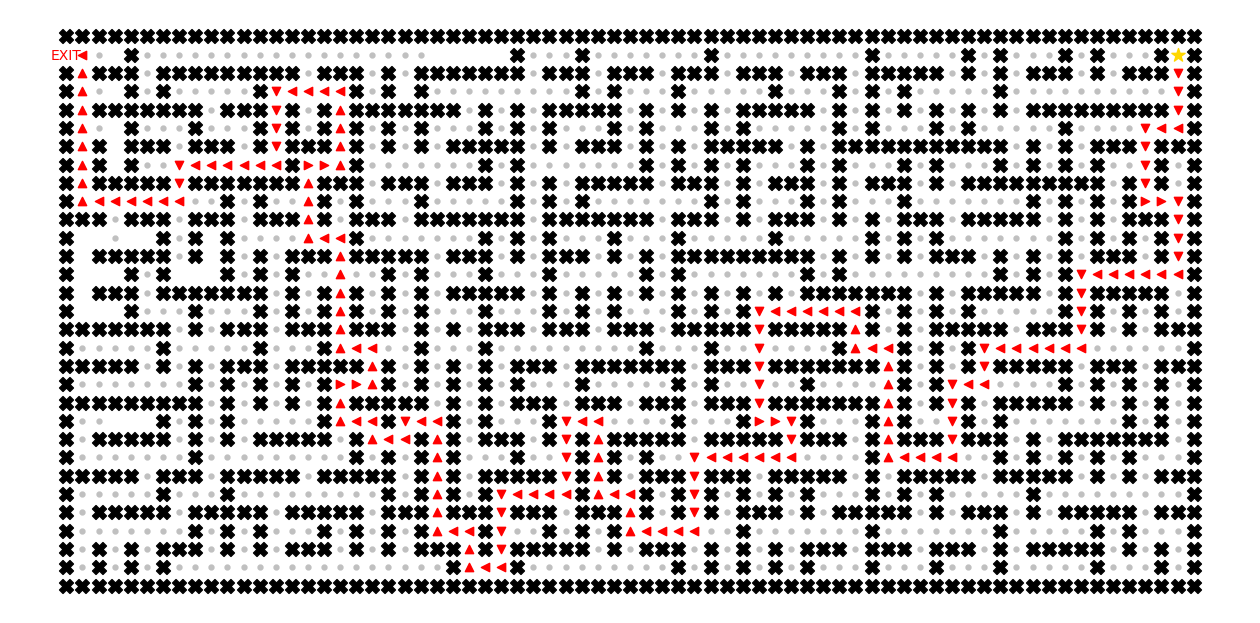

Starting point (x, y) = (1, 69)
Ending point (x, y) = (1, 0)
Cost: 183


In [67]:
run_search_nobonus(g5, Astar, euclide_heuristic,figsize=(16,8))

BFS và A* đã tìm được đường đi ngắn nhất từ `START` đến `EXIT` .DFS vẫn là thuật toán tốn nhiều chi phí nhất khi đi lòng vòng.

Ở đây chúng em thử GBFS với 2 hàm heuristic là hàm khoảng cách Manhattan và Euclide,chi phí đường đi của 2 trường hợp này là khác nhau và không có trường hợp nào tìm được đường đi ngắn nhất.Tuy nhiên khác với mê cung 4,trong mê cung này hàm khoảng cách Euclid tỏ ra hiệu quả hơn hàm khoảng cách Manhattan do đường đi ngắn nhất mê cung có nhiều sự ngăn cản từ các bức tường.


Ngoài ra, ta cũng thấy được trong bản đồ này A* duyệt ít ô hơn (các ô màu xám) so với thuật toán BFS.

| Thuật toán | Chi phí |
|------------|---------|
| DFS        |   207     |
| BFS        |   183     |
| GBFS (E)   |   195     |
| GBFS (M)   |   199     |
| A* (M)     |   183     |